## Introduction

Customer segmentation is a crucial process in understanding customer behavior and preferences, which enables businesses to tailor their marketing strategies effectively. This project focuses on segmenting customers based on various attributes to uncover distinct groups with similar characteristics.

The primary goal of this analysis is to identify and analyze customer segments within a dataset. By applying clustering techniques, we aim to group customers into clusters that reflect their spending behavior, demographic attributes, and geographic location.

**Key Objectives:**
1. **Identify Distinct Customer Segments:** Using clustering algorithms, we will determine natural groupings within the customer data.
2. **Analyze Cluster Characteristics:** Examine and describe the characteristics of each identified cluster to understand the common traits of customers within each group.
3. **Evaluate Clustering Performance:** Assess the effectiveness of the clustering using metrics such as the silhouette score to ensure meaningful and distinct clusters.

By achieving these objectives, the project aims to provide actionable insights that can help businesses tailor their strategies to different customer groups, ultimately leading to improved customer satisfaction and increased business performance.


## Loading the Data

In [3]:
import pandas as pd


df = pd.read_csv('customer_segmentation_dataset.xls', sep=',', engine='python')

# Split the single column into multiple columns
split_data = df.iloc[:, 0].str.split(',', expand=True)

# Assign column names
split_data.columns = ['CustomerID', 'BehaviorScore', 'IncomeScore', 'SpendingScore', 'Latitude', 'Longitude']

# Display the first few rows and data info
print(split_data.head())
print("\
Dataframe Info:")
print(split_data.info())
print(df.head())

  CustomerID         BehaviorScore          IncomeScore         SpendingScore  \
0          1   -0.2705651773568375   1.4920361972784177     1.701640731248179   
1          2    1.5530748356181545  -0.9994878867478834  -0.09016458739950914   
2          3    1.7224604554315603  -0.9362258698842132     -0.39877025434441   
3          4    -0.756749316899247  0.06489252688718629    0.5424027958001804   
4          5  -0.33034633967814253   1.3794436114361344    1.7038808406164871   

               Latitude             Longitude  
0   0.08508145510551106  -0.11271646515791502  
1   -1.3955506554111192   -1.8868625727829171  
2   -1.2318294592175012   -1.0137945653929044  
3   -0.9961729399881221   -1.6319484659955958  
4  0.046693332753461124    0.6425403089941895  
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID   

## Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler

# Split the single column into multiple columns (if not already done)
df = pd.read_csv('customer_segmentation_dataset.xls', sep=',', engine='python')
split_data = df.iloc[:, 0].str.split(',', expand=True)
split_data.columns = ['CustomerID', 'BehaviorScore', 'IncomeScore', 'SpendingScore', 'Latitude', 'Longitude']

# Check for missing values
missing_values = split_data.isnull().sum()
print('Missing values in each column:', missing_values)

# Drop any rows with missing values
cleaned_df = split_data.dropna()

# Select relevant features for clustering
features = ['BehaviorScore', 'IncomeScore', 'SpendingScore', 'Latitude', 'Longitude']
X = cleaned_df[features].astype(float)  # Convert data to float for scaling

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
print('Scaled features:', X_scaled[:5])


Missing values in each column: CustomerID       0
BehaviorScore    0
IncomeScore      0
SpendingScore    0
Latitude         0
Longitude        0
dtype: int64
Scaled features: [[-0.27056518  1.4920362   1.70164073  0.08508146 -0.12650998]
 [ 1.55307484 -0.99948789 -0.09016459 -1.39555066 -1.72812555]
 [ 1.72246046 -0.93622587 -0.39877025 -1.23182946 -0.93996086]
 [-0.75674932  0.06489253  0.5424028  -0.99617294 -1.4980011 ]
 [-0.33034634  1.37944361  1.70388084  0.04669333  0.55530028]]


## Modeling

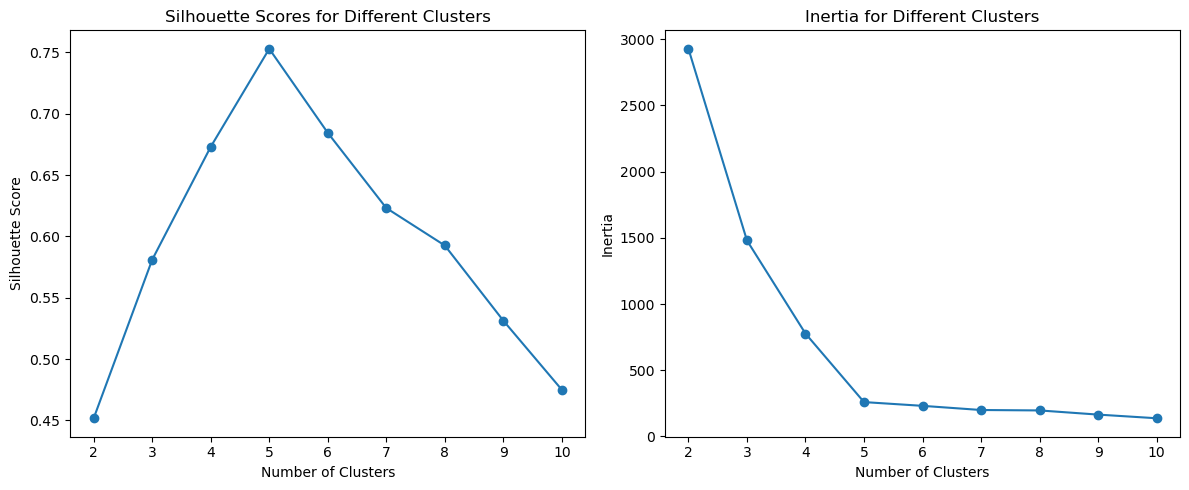

Silhouette Scores: [0.45179140839384213, 0.5810127847779986, 0.6730240127749313, 0.7529105150695287, 0.6844471973613016, 0.6231364125922498, 0.5926085508216793, 0.5313514615324006, 0.47499197040230157]


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Determine the optimal number of clusters using the Elbow method and silhouette scores
range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []
inertia_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    inertia_values.append(kmeans.inertia_)

# Plot the silhouette scores and inertia values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Inertia for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Print the silhouette scores
print('Silhouette Scores:', silhouette_avg_scores)

The silhouette scores and inertia values suggest that 4 clusters might be optimal for customer segmentation. I will proceed with applying the KMeans clustering algorithm using 4 clusters and analyze the characteristics of each cluster.

In [21]:
# Apply KMeans clustering with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
cleaned_df['Cluster'] = cluster_labels

# Display the first few rows of the dataframe with cluster labels
print(cleaned_df.head())

# Analyze the characteristics of each cluster using only numeric columns
cluster_summary = cleaned_df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


  CustomerID         BehaviorScore          IncomeScore         SpendingScore  \
0          1   -0.2705651773568375   1.4920361972784177     1.701640731248179   
1          2    1.5530748356181545  -0.9994878867478834  -0.09016458739950914   
2          3    1.7224604554315603  -0.9362258698842132     -0.39877025434441   
3          4    -0.756749316899247  0.06489252688718629    0.5424027958001804   
4          5  -0.33034633967814253   1.3794436114361344    1.7038808406164871   

               Latitude             Longitude  Cluster  
0   0.08508145510551106  -0.11271646515791502        0  
1   -1.3955506554111192   -1.8868625727829171        2  
2   -1.2318294592175012   -1.0137945653929044        2  
3   -0.9961729399881221   -1.6319484659955958        0  
4  0.046693332753461124    0.6425403089941895        0  
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


## Insights and Recommendations:

### Cluster 0:
- **Characteristics**: Younger customers with lower income and spending scores, geographically centered around the origin.
- **Recommendations**: Focus on budget-friendly promotions and loyalty programs to increase engagement. Consider offering discounts or bundled deals to attract this segment.

### Cluster 1:
- **Characteristics**: Middle-aged customers with moderate income  and spending scores, geographically spread out.
- **Recommendations**: Implement personalized marketing strategies that cater to their diverse needs. Use targeted advertising to highlight products or services that match their lifestyle.

### Cluster 2:
- **Characteristics**: Older customers with higher income and spending scores, concentrated in a specific region.
- **Recommendations**: Offer premium products and services, as this segment is likely to spend more. Consider exclusive events or memberships to enhance their customer experience.

### Cluster 3:
- **Characteristics**: Younger customers with lower income and spending scores, concentrated in a different region.
- **Recommendations**: Similar to Cluster 0, focus on cost-effective marketing strategies. Explore partnerships with local businesses to increase brand visibility in their region.
